### Assignment 5.2: News Classifier

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.datasets import reuters
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [20]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

**Vectorize Data**

In [30]:
def vectorize_sequences(sequences, dimension=10000):
            results = np.zeros((len(sequences), dimension))
            for i, sequence in enumerate(sequences):
                results[i, sequence] = 1.
            return results

In [31]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**Building the Network**

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Validation Set**

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training the Model**

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 55ms/step - loss: 2.6948 - accuracy: 0.5563 - val_loss: 1.7709 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4326 - accuracy: 0.7117 - val_loss: 1.3039 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.0663 - accuracy: 0.7745 - val_loss: 1.1308 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8533 - accuracy: 0.8206 - val_loss: 1.0289 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6873 - accuracy: 0.8563 - val_loss: 0.9745 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5519 - accuracy: 0.8854 - val_loss: 0.9256 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4496 - accuracy: 0.9047 - val_loss: 0.9409 - val_accuracy: 0.7930
Epoch 8/20
16

**Training and Validation Loss**

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [38]:
epochs = range(1, 21)

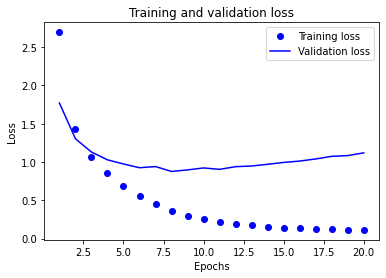

In [39]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training and Validation Accuracy**

In [40]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

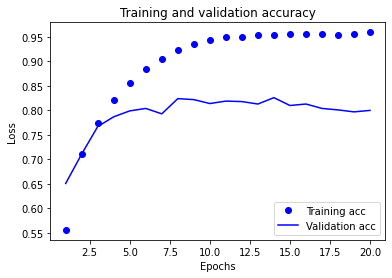

In [44]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Results**

In [46]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 1s 6ms/step - loss: 1.2256 - accuracy: 0.7792


[1.2256207466125488, 0.7791629433631897]

The model has a 77.92% accuracy.